In [1]:
from random import randint
from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import openpyxl
from xlwt import Workbook

In [9]:
# client = MongoClient()
# db = client.binproj
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1')
exceldoc = str(input("Enter the excel file name:"))

Enter the excel file name:bindatafull


In [10]:
binbasehgt = 100
binfiltime = 360
# week = 20
# desn = 'No'
for i in range(500):
    binno = i
    houses = randint(500,5000)
    if houses > 3000:
        binfilhgt = randint(60,100)
    else:
        binfilhgt = randint(1,60)
#     print("height: " + str(binfilhgt))
    binfil = (int(binfilhgt) / int(binbasehgt)) * 100
    binfilp = str(int(binfil)) + "%"
#     print("filled percent: " + str((binfil)) + "%")
    binfiltime1 = (binfiltime) / 60
#     print("In hours: " + str((binfiltime1)) + " hr")
    rateoffil = (binfil) / (binfiltime1)
#     print("Rate of filling "+str((rateoffil)) + "cm/hr")
    binendtim = (float(binbasehgt) / float(rateoffil))
    binendtim = round(binendtim, 2)
    binendtim2 = binendtim - binfiltime1
    binendtim2 = round(binendtim2, 2)
    if binendtim < 1:
        binendtim = binendtim * 60
        fill1 =  (str(int(binendtim))+ " min")
    elif binendtim > 1:
        p = binendtim
        k = (str(p).split('.'))
        j = (int(k[1]) * .60)
        fill1 = ( str(int(k[0]))+ " hr " + str(int(j)) + " min")
    else:
        fill1 = ( str(int(binendtim))+ " hr")
        
    if binendtim2 < 1:
        binendtim2 = binendtim2 * 60
        fill = (str(int(binendtim2))+ " min")    
    elif binendtim2 > 1:
        p = binendtim2
        k = (str(p).split('.'))
        j = (int(k[1]) * .60)
        fill = (str(int(k[0]))+ " hr " + str(int(j)) + " min")
    else:
        fill = (str(int(binendtim2))+ " hr")
    u = fill
    uv = u.split(' ')
    um = []
    for j in range(len(uv)):
        if uv[j].isdigit() == True:
            um.append(uv[j])
    if len(um) < 2:
        time = (float('.' + um[0]))  
    else:
        time = (float(um[0]+ '.' + um[1]))
    if time < 3.0:
        desn = 1
    else:
        desn = 0
        
  
    
#     db.ratevalues.insert_one({"Base height":binbasehgt,"filled percent":binfilp,"Checking time(hours)":binfiltime1,
#                               "Rate of filling per  hour":rateoffil,
#                               "Calculated time":fill1,"Remaining time to fill":fill})
    sheet1.write(i+1,0,binno)
    sheet1.write(i+1,1,houses)  
    sheet1.write(i+1,2,binfilp)  
    sheet1.write(i+1,3,binfiltime1)
    sheet1.write(i+1,4,rateoffil) 
    sheet1.write(i+1,5,desn)
 
     
sheet1.write(0,0,"Bin number")
sheet1.write(0,1,"Houses")
sheet1.write(0,2,"filled percent")  
sheet1.write(0,3,"Checking time(hours)")
sheet1.write(0,4,"Rate of filling  per hour")  
sheet1.write(0,5,"Call Truck")
wb.save(exceldoc +'.csv') 

In [24]:
def rate():
    binbasehgt = input("enter base height:")
    houses = input("enter number of houses:")
    wph = binfilhgt / houses
    binfilhgt = input("enter height:")
    binfil = (int(binfilhgt) / int(binbasehgt)) * 100
#     print(str((binfil)) + "%")
    binfiltime = int(input("Enter time in minutes:"))
    binfiltime1 = (binfiltime) / 60
#     print(str((binfiltime1)) + "hr")
    rateoffil = (binfil) / (binfiltime1)
    print("Rate of filling "+str((rateoffil)) + "cm/hr")
    binendtim = (float(binbasehgt) / float(rateoffil))
    binendtim = round(binendtim, 2)
    binendtim2 = binendtim - binfiltime1
    binendtim2 = round(binendtim2, 2)
    if binendtim < 1:
        binendtim = binendtim * 60
        print("Time needed to fill the bin " + str(int(binendtim))+ " min")
    elif binendtim > 1:
        p = binendtim
        k = (str(p).split('.'))
        j = (int(k[1]) * .60)
        print("Time needed to fill the bin " + str(int(k[0]))+ " hr " + str(int(j)) + " min")
    else:
        print("Time needed to fill the bin " + str(int(binendtim))+ " hr")
    if binendtim2 < 1:
        binendtim2 = binendtim2 * 60
        print("Remaining time taken to fill the bin " + str(int(binendtim2))+ " min")
    elif binendtim2 > 1:
        p = binendtim2
        k = (str(p).split('.'))
        j = (int(k[1]) * .60)
        print("Remaining time taken to fill the bin " + str(int(k[0]))+ " hr " + str(int(j)) + " min")
    else:
        print("Remaining time taken to fill the bin " + str(int(binendtim2))+ " hr")
    

In [25]:
rate()


enter base height:100
enter height:30
Enter time in minutes:20
Rate of filling 90.0cm/hr
Time needed to fill the bin 1 hr 6 min
Remaining time taken to fill the bin 46 min


In [2]:
dataset = pd.read_csv('datasetbin.csv')

In [3]:
dataset

,Bin number,Week,filled percent,Checking time(hours),Rate of filling per hour,Call Truck
0,0,0,77%,6,12.833333,Yes
1,1,0,62%,6,10.333333,No
2,2,0,10%,6,1.666667,No
3,3,0,85%,6,14.166667,Yes
4,4,0,13%,6,2.166667,No
5,5,0,95%,6,15.833333,Yes
6,6,0,42%,6,7.000000,No
7,7,0,39%,6,6.500000,No
8,8,0,82%,6,13.666667,Yes
9,9,0,36%,6,6.000000,No


In [7]:
X = dataset.iloc[:,1]
x = dataset.iloc[:,1]
y = dataset.iloc[:,0]
z = dataset.iloc[:,2]
yval = []
j = X[-10:]

In [9]:
print(type(j))

<class 'pandas.core.series.Series'>


In [23]:
for i in range(len(z)):
    u1 = (z[i])
    uv3 = u1.split('%')
    um1 = []
    for i in range(len(uv3)):
        if uv3[i].isdigit() == True:
            um1.append(uv3[i])
    if len(um1) < 2:
        Yval = (float(um1[0])) 
    yval.append(Yval)

In [5]:
ug = []
for i in range(len(x)):
    uh = []
    uh.append(X[i])
    uh.append(x[i])
    uh.append(y[i])
    ug.append(uh)
    
    

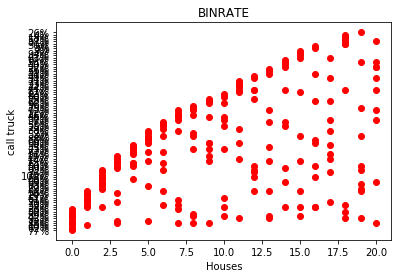

In [19]:

plt.scatter(X, z, color = 'red')
# plt.plot(X, z, color = 'blue')
plt.title('BINRATE')
plt.xlabel('week')
plt.ylabel('percent')
plt.show()

In [ ]:
##from matplotlib.colors import ListedColormap
##
##
##X_set, y_set = X_train, y_train
##X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
##                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
##
##plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
##             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
##                     
##plt.xlim(X1.min(), X1.max())
##plt.ylim(X2.min(), X2.max())
##for i, j in enumerate(np.unique(y_set)):
##    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
##                c = ListedColormap(('red', 'green'))(i), label = j)
##
##plt.title('binrate(training set)')

##X_set, y_set = X_test, y_test
##X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
##                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
##
##plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
##             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
##                     
##plt.xlim(X1.min(), X1.max())
##plt.ylim(X2.min(), X2.max())
##for i, j in enumerate(np.unique(y_set)):
##    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
##                c = ListedColormap(('red', 'green'))(i), label = j)
##
##plt.title('binrate(test set)')










##
##plt.xlabel('houses')
##plt.ylabel('filled percent')
##plt.legend()
##plt.show()